In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.utils import shuffle
import nltk
nltk.download('punkt')

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
fake = pd.read_csv('data/fake.csv')
real = pd.read_csv('data/real.csv')

print(fake.shape)
print(real.shape)

(23481, 4)
(21417, 4)


In [6]:
fake['isfake'] = 1
real['isfake'] = 0

In [7]:
df = pd.concat([fake, real]).reset_index(drop=True)

In [8]:
#shuffle data
df = shuffle(df)
df = df.reset_index(drop=True)

In [9]:
#Combine title and text together
df['all_text'] = df['title'] + ' ' + df['text']

In [10]:
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\farha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def remove_stopwords(text):
    '''
    -Remove all stopwords and words with two or less characters
    '''
    res = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            res.append(token)
            
    return res

In [12]:
df['clean'] = df['all_text'].apply(remove_stopwords)

In [13]:
df['clean_joined'] = df['clean'].apply(lambda x: ' '.join(x))

In [14]:
#obtain a list of the total words in the dataset

word_list = []
for i in df.clean:
    for j in i:
        word_list.append(j)
        
len(word_list)

9278574

In [15]:
total_words = len(list(set(word_list)))
total_words

108705

In [16]:
x = df.clean_joined
y = df.isfake

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
vec_train = CountVectorizer().fit(x_train)

x_vec_train = vec_train.transform(x_train)
x_vec_test = vec_train.transform(x_test)

model = LogisticRegression(C=3)
model.fit(x_vec_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3)

In [18]:
pred = model.predict(x_vec_test)

In [19]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [32]:
accuracy = accuracy_score(y_test, pred)
accuracy

0.9953229398663697

<AxesSubplot:>

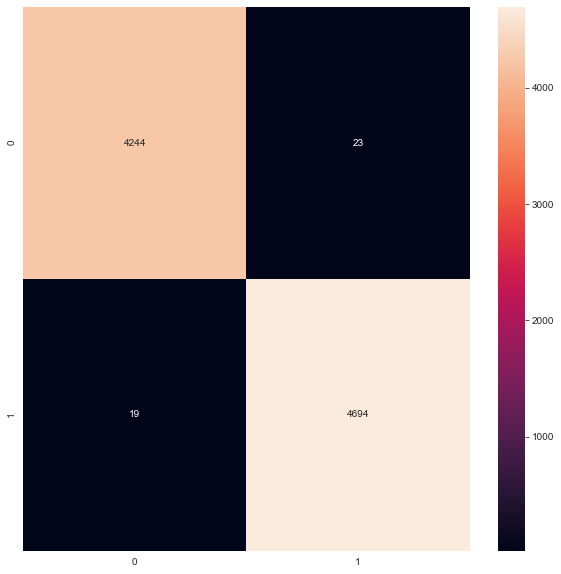

In [21]:
#Confusion matrix

matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(matrix, annot = True,fmt='g')